# STAT-517 Project-1

## Que:-2: Predicting Income >$50k or not

This study focuses on the US Adult Census dataset; a repository of 32,561 entires carefully extracted from 
the 1994 US Census database. We would like to determine if an individual has a salary greater 
than or less than $50,000 annually based on the variables provided. 

Present useful graphics to understand and/or reveal sensible info about the data set. Develop feasible models and compare their predictive accuracies and performance as a whole. Discuss the pros and cons of these models. Summarize and critique your modeling and findings. 

The data can be retrieved as follows:


In [26]:
import pandas as pd
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Nominal Attributes
* **workclass**:
     Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
Without-pay, Never-worked.
* **education**: 
     Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **marital-status**:
     Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: 
     Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: 
     Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Descriptions of an individual's race
     White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: 
     Male, Female
* **native-country**: 
     United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hongkong, Holand-Netherlands.

### Continuous Attributes
* **age**
* **fnlwgt**
* **education-num**
* **capital-gain**
* **capital-loss**
* **hours-per-week**


# Solution:

In [6]:
import numpy as np
import pandas as pd
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Modeling

In [7]:
import seaborn as sns
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Target variable

Target variable for given dataset is 'Salary'.
In following cell, define the count of individuals has salary <=50K or salary >50K.

# Cleaning dataset

We have to run cleaning operations before modelling the data such as finding null value, missing data, data with '?', '*' characters and many more.

In [8]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']:
    print (value,":", sum(adult[value] == ' ?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
salary : 0


In [9]:
defected_columns = ['workclass', 'occupation', 'native_country']
for col in defected_columns:
    adult[col] = (adult[col].replace(to_replace=' ?', value=np.nan))

adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Pandas DataFrame

Pandas DataFrame: x_adult and y_adult. 
x_adult consists of all the continuous columns from the given dataset.

In [10]:
import pandas as pd
x_adult = pd.DataFrame([adult.age, adult.fnlwgt, adult.education_num, adult.capital_gain, adult.capital_loss, adult.hours_per_week]).T
y_adult = pd.DataFrame([adult.salary]).T
print (x_adult.shape)
print (y_adult.shape)

(32561, 6)
(32561, 1)


# Training and Testing Datasets

In [11]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_adult, y_adult, random_state = 4, test_size = 0.8)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(6512, 6)
(26049, 6)
(6512, 1)
(26049, 1)


E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Gaussian Naive Bayes

In [15]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
acc_gauss1 = round(model.score(xtrain, ytrain)*100)
print ('Training accuracy = {}'.format(acc_gauss1)*100)
acc_gauss = round(accuracy_score(ytest, ymodel))
print ('Testing accuracy = {}'.format(acc_gauss))

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accuracy = 80.0Training accurac

# K - Nearest Neighbor

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(xtrain, ytrain)
ymodel = model.predict(xtest)
acc_knn1 = round(model.score(xtrain, ytrain) * 100)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest, ymodel) * 100)
print ('Testing accuracy = {}'.format(acc_knn))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Training accuracy = 100.0
Testing accuracy = 71.0


# Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
acc_log1 = round(logreg.score(xtrain, ytrain) * 100)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest, y_pred) * 100)
print ('Testing accuracy = {}'.format(acc_log))

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 80.0
Testing accuracy = 80.0


# Stochastic Gradient Descent

In [19]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100,4)
print ('Training accuracy = {}'.format(acc_sgd1))
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 4)
print ('Testing accuracy = {}'.format(acc_sgd))

E:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 78.6087
Testing accuracy = 78.4291


# Decision Tree

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 4)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 4)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 100.0
Testing accuracy = 76.5327


# Result

In [31]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'KNN', 'Logistic regression', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Training Score': [acc_gauss1, acc_knn1, acc_log1, acc_sgd1, acc_decision_tree1],
    'Testing Score': [acc_gauss, acc_knn, acc_log, acc_sgd1, acc_decision_tree]})
models

,Model,Training Score,Testing Score
0,Gaussian Naive Bayes,80.0000,1.0000
1,KNN,100.0000,71.0000
2,Logistic regression,80.0000,80.0000
3,Stochastic Gradient Decent,78.6087,78.6087
4,Decision Tree,100.0000,76.5327


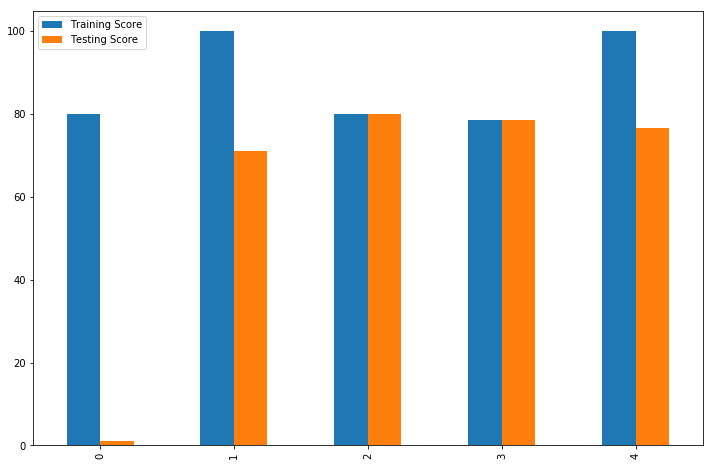

In [32]:
models.plot(kind = 'bar', figsize = (12, 8))

## Que-3: Purchasing Insurance

In [33]:
import pandas as pd
Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
3,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
4,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No
5,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,No
6,10,1,4,3,3,1,4,1,4,7,...,0,0,0,0,0,0,0,0,0,No
7,9,1,3,3,3,1,3,2,4,7,...,0,0,0,1,0,0,0,0,0,No
8,33,1,2,3,8,1,4,1,4,6,...,0,0,0,0,0,0,0,0,0,No
9,41,1,3,3,10,0,5,0,4,7,...,0,0,0,0,0,0,0,0,0,No


In [34]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_unk

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,0,1,0,1,0,0,0
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
3,38,1,3,2,9,2,2,2,4,7,...,0,0,0,1,0,0,0,0,0,0
4,35,1,2,3,8,1,5,1,3,5,...,0,0,0,0,1,0,0,0,0,0
5,12,1,4,2,3,0,4,0,5,9,...,0,0,0,0,0,0,0,0,0,0
6,38,1,3,2,9,0,4,0,5,9,...,0,0,0,0,1,0,0,0,0,0
7,3,1,2,3,1,1,5,1,3,6,...,0,0,0,0,1,0,0,0,0,0
8,8,1,3,3,2,1,7,0,1,6,...,0,0,0,0,1,0,0,0,0,0
9,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,1,0,0,0,0,0


The data above contains 4630 real customer records. Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86). The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy. 

Based on a direct marketing problem, the goal is to $predict$ and $interpret$ caravan insurance policy ownership on the basis of product usage and sociodemographic data supplied about the customer.

Consider using all prediction models you learned for the prediction task, suppose your supervisor has limited time and resources to only approach 50 customers.
You are asked to recommend to your supervisor a subset of 50 customers from these 1064 customers in the Caravan_unk file who would most likely buy a caravan policy.
Report **just the row numbers** of your selected 50 customers as they appear in the Caravan_unk file in increasing order (say, row #4, 7, 11, 59, 113, ...), then explain how you come up with this selected subset and your entire modeling process. 

# Solution:

# Training and Testing Datasets

We identify the target and non-target attributes in our dataset.
'Purchase' is the target attribute (y_caravan) while all the other attributes are non-target (x_caravan).
Further we split the whole dataset into training (xtrain and ytrain) and testing (xtest and ytest).
We split 75% and 25% between training and testing datasets.

In [35]:
import pandas as pd
x_caravan = pd.DataFrame(Caravan_train).T
x_caravan = x_caravan.drop(['Purchase'])
x_caravan = x_caravan.T
print (x_caravan.shape)
y_caravan = pd.DataFrame([Caravan_train.Purchase]).T
print (y_caravan.shape)
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_caravan, y_caravan, random_state = 1, test_size = 0.25)

(4630, 85)
(4630, 1)


# Importing Data Modelling Tools 

Now we import tools for further data operations.
For data analysis, we used pandas, numpy and random.
For visualization, we used matplotlib and seaborn.
For modelling data, we used logistic regression, support vector machines and many more.

In [36]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Playing Around and Analyzing Data.

There are various columns in the dataset upon which the target attribute depends.
I am showing histograms for a few attributes and their relation with our target attribute i.e. purchase = yes or purchase = no.

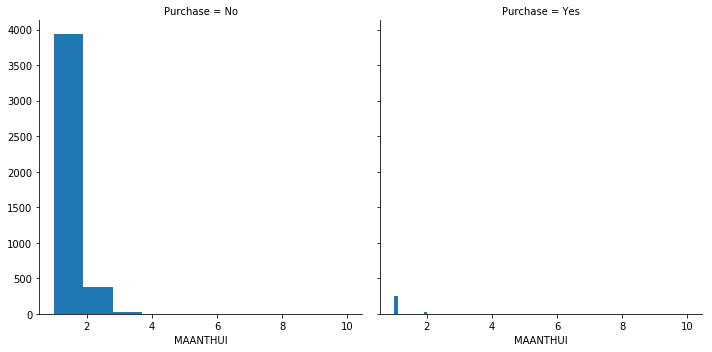

In [37]:
g = sns.FacetGrid(Caravan_train, col='Purchase', size = 5)
g.map(plt.hist, 'MAANTHUI', bins=10)

# Logistic Regression

Now since we have already splitted our dataset into training and testing, we will apply various models one by one over the dataset and record their training and testing accuracy.

In [38]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
y_pred = logreg.predict(xtest)
acc_log1 = round(logreg.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.15
Testing accuracy = 92.92


# K - Nearest Neighbor

In [39]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
acc_knn1 = round(knn.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_knn))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training accuracy = 99.28
Testing accuracy = 89.12


# Perceptron

In [40]:
perceptron = Perceptron()
perceptron.fit(xtrain, ytrain)
y_pred = perceptron.predict(xtest)
acc_perceptron1 = round(perceptron.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_perceptron1))
acc_perceptron = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_perceptron))

E:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.07
Testing accuracy = 93.18


# Stochastic Gradient Descent

In [41]:
sgd = SGDClassifier()
sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xtest)
acc_sgd1 = round(sgd.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_sgd1))
acc_sgd = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_sgd))

E:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 94.1
Testing accuracy = 93.18


# Decision Tree

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
y_pred = decision_tree.predict(xtest)
acc_decision_tree1 = round(decision_tree.score(xtrain, ytrain) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest, y_pred) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))

Training accuracy = 99.31
Testing accuracy = 88.08


# Result

Now framing the various models used in the modelling process according to its training and testing accuracy and reporting the results in a tabulated form.

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Training Score': [acc_log1, acc_knn1, acc_perceptron1, acc_sgd1, acc_decision_tree1],
    'Testing Score': [acc_log, acc_knn, acc_perceptron, acc_sgd, acc_decision_tree]})
models

,Model,Training Score,Testing Score
0,Logistic Regression,94.15,92.92
1,KNN,99.28,89.12
2,Perceptron,94.07,93.18
3,Stochastic Gradient Decent,94.10,93.18
4,Decision Tree,99.31,88.08


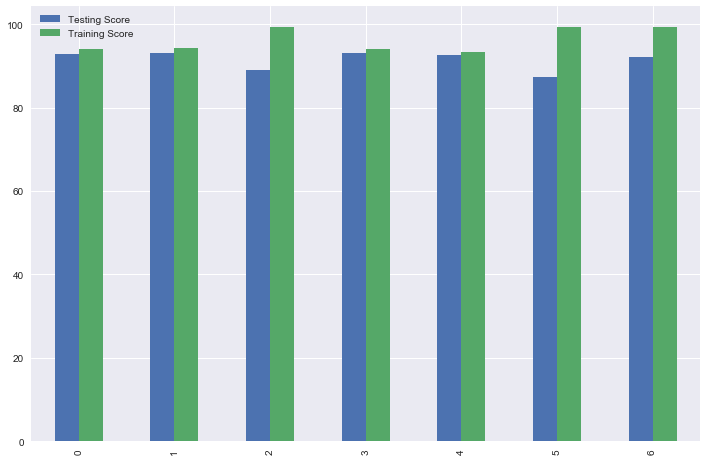

In [73]:
#Plotting the training and testing scores obtained using different models in a bar graph.
models.plot(kind = 'bar', figsize = (12, 8))